# Mathematical morphology

The goal of this homework is to study basics concepts related to mathematical morphology (structuring elements, erosion, dilation, opening, closing, operators by reconstruction). Let us first load the necessary packages for this laboratory. 



In [ ]:
!pip install plotly==5.6.0 matplotlib==3.5.1

Upload the "Data.zip" in the session storage (using the "Files" and "Upload" options on the upper left part of the browser). The Archive contains the image material corresponding to this lab. 

Once the upload is done, decompress the archive.

In [ ]:
!unzip Data.zip

## 1 Structuring elements
The morphological equivalent to the notion of impulse response is the structuring element. To precisley study erosion and dilation, the  [scipy.ndimage](https://docs.scipy.org/doc/scipy-0.18.1/reference/ndimage.html) package will be used in this section. It contains various functions for multi-dimensional image processing including basic morphological transforms. Moreover, it precisely controls the padding used for morphological filtering and the structuring element definition.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy   import ndimage
from skimage import io, transform

def display_image(img, title='', size=None):
  #plt.subplot(1,2,1)
  plt.gray()
  h = plt.imshow(img, interpolation='none', vmin=0, vmax=1)
  if size:
    dpi = h.figure.get_dpi()/size
    h.figure.set_figwidth(img.shape[1] / dpi)
    h.figure.set_figheight(img.shape[0] / dpi)
    h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)
    h.axes.set_position([0, 0, 1, 1])
    h.axes.set_xlim(-1, img.shape[1])
    h.axes.set_ylim(img.shape[0], -1)
  plt.grid(False)
  plt.title(title)  
  plt.show()

In this session, three flat structuring elements are used: "Flat" here means that the values of the structuring elements are either 0 or $-\infty$. The locations where the values are equal to 0 define a mask or a window below which the image values are observed and processed. In python, instead of using 0 and $-\infty$, the mask is created with values at 1 and 0 respectively.     
* The first structuring element, se1, is a square of size 7x7. The space origin is at the center of the structuring element. 
* The second structuring element, se2, contains only two points on the border of the 7x7 window. **You will have to define these two points** in such a way that the line they form does not pass over the center on the structuring element (that is the space origin). 
* Finally, the structuring element se3 is a vertical segment of length 11. The space origin is at the center of the segment.

In [2]:
se1 = np.ones((7,7))

se2 = np.zeros((7,7))
se2[0,0]=1    # Choose the 2 locations included in the structuring element  
se2[0,1]=1    # such that they are at the border of the 7x7 square and 
              # the line they form does not pass over the center of the 
              # structuring element
    
se3 = np.zeros((11,11))
se3[:,5] = 1

print("se1")
print(se1)
print("se2")
print(se2)
print("se3")
print(se3)

se1
[[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]
se2
[[1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
se3
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


We are going to analyze the morphological content of the "Shape.jpg" image. Let us read it so that you can process it. We will aslo resize it. 


In [3]:
ima = io.imread('Shape.jpg',as_gray=True)
ima = transform.resize(ima,(512, 512),mode='reflect') 
ima.shape

(512, 512)

Visualize the image

C:\Users\amola\AppData\Local\Temp\ipykernel_9468\2450367892.py:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


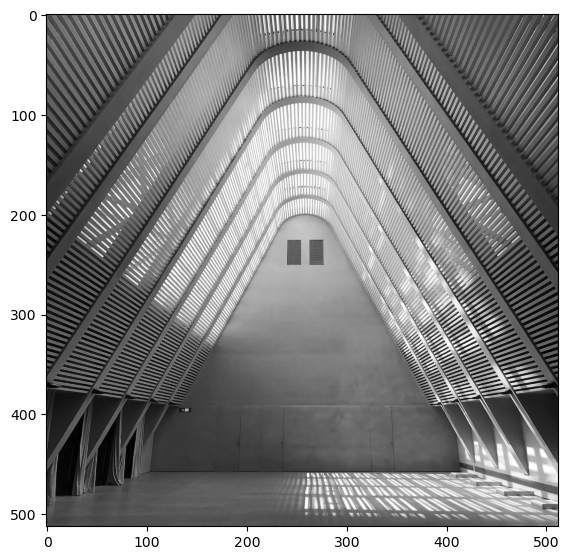

In [4]:
display_image(ima,size=1)

Compute the maximum and minimum gray level value of the image. This information will be used to define the padding. 

In [5]:
maxval = np.amax(ima)
minval = np.amin(ima)
print("Max=",maxval,", Min=",minval)

Max= 0.9995858612831748 , Min= 0.0033481194751113197


## 2 Erosion and Dilation
The two basic operators created in a lattice are the dilation and the erosion. Compute the erosion and dilation of the image with the  structuring element se1. The mode='constant' indicates that a constant padding is done outside the image with a value defined by cval. In order to avoid noticing the influence of the padding, in the case of the dilation  (erosion), the padding value is defined as minval (maxval). For example, in the case of dilation a max will be computed and the values inside the image will always be greater than or equal to minval. 

Note: In order to precisely see the image content, you may modify the size parameter involved in the display_image call.


C:\Users\amola\AppData\Local\Temp\ipykernel_9468\2450367892.py:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


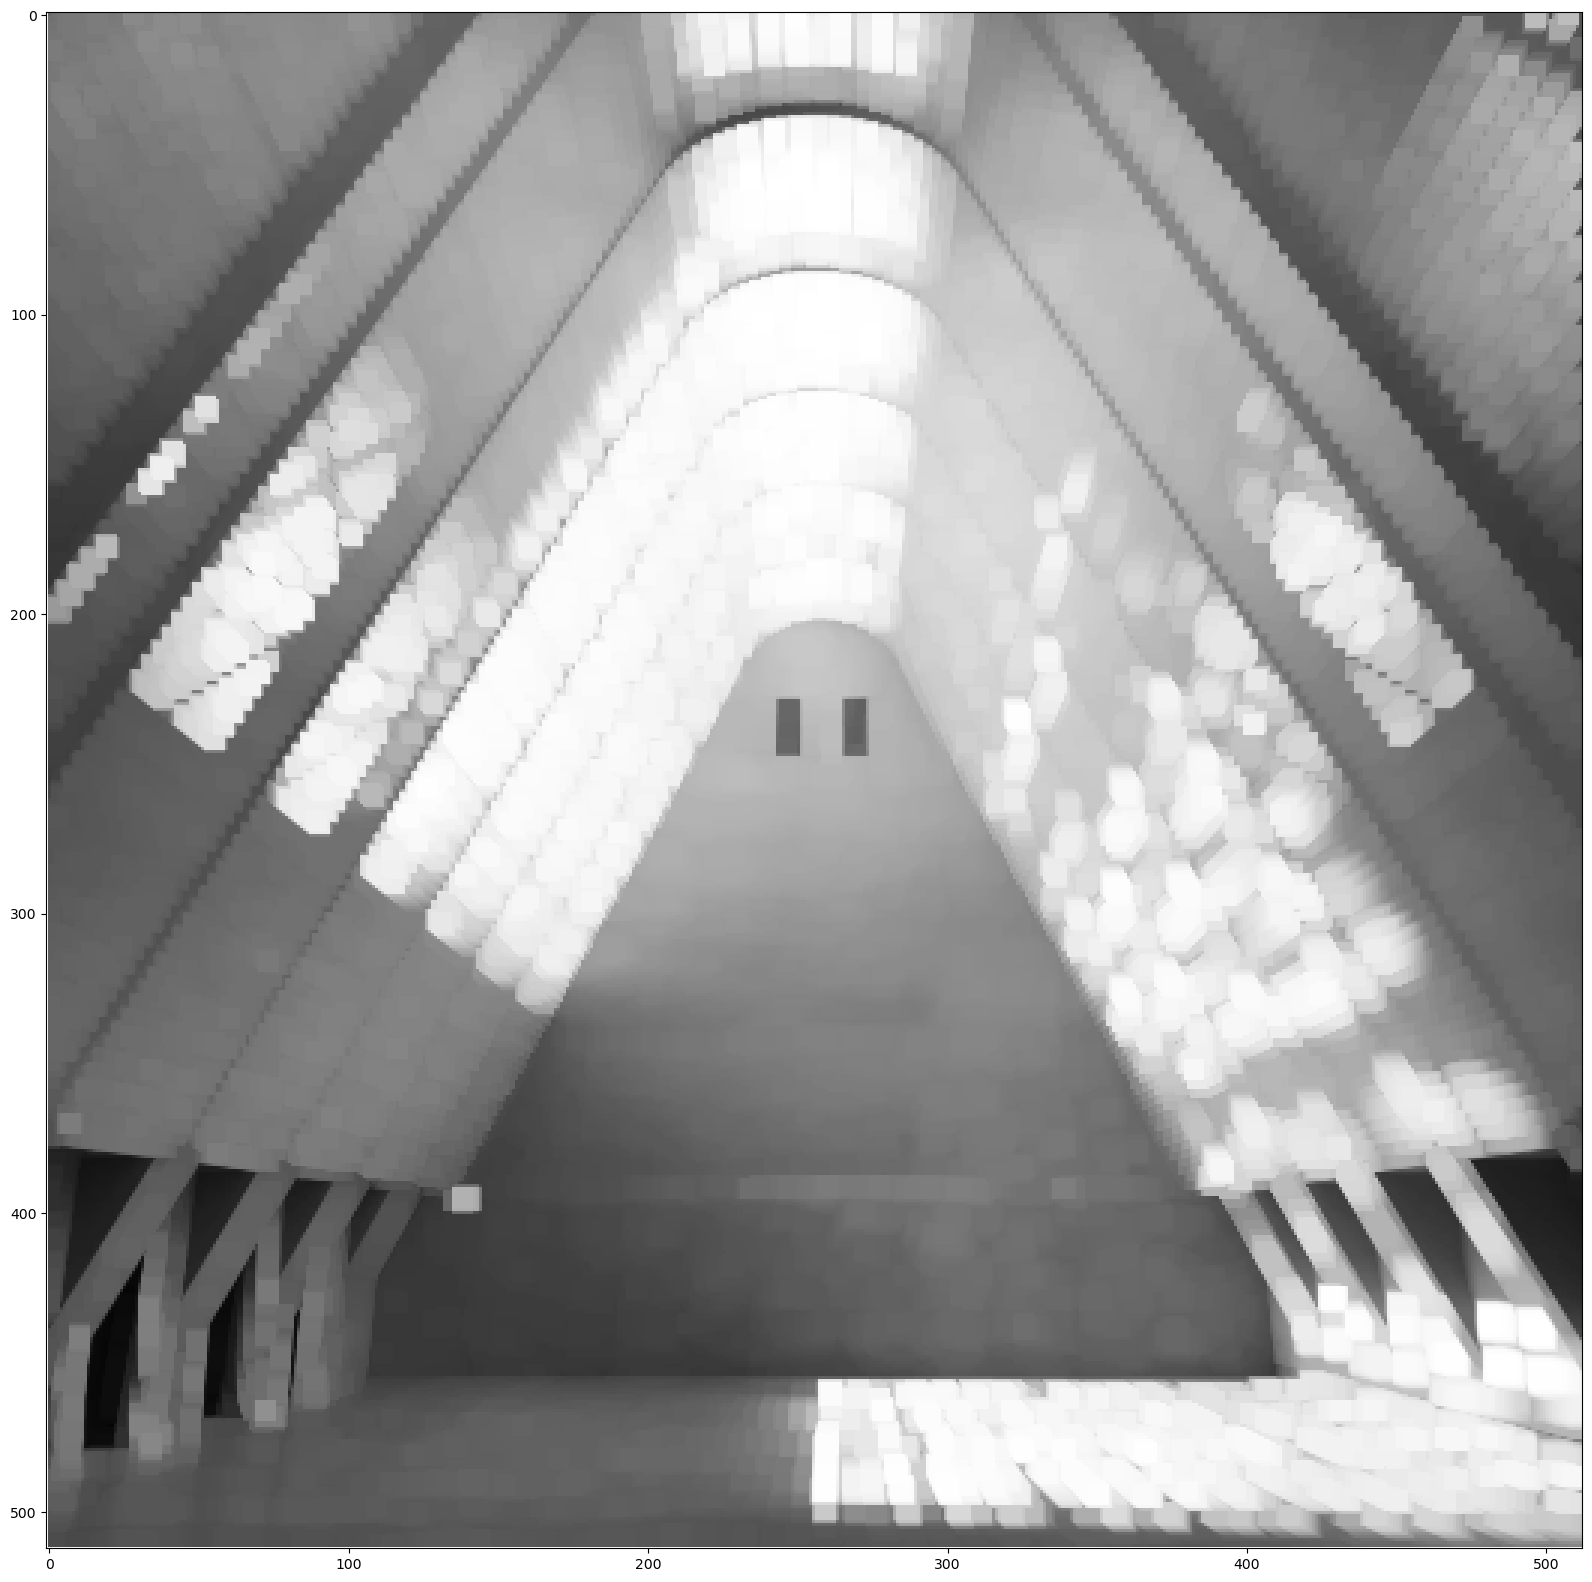

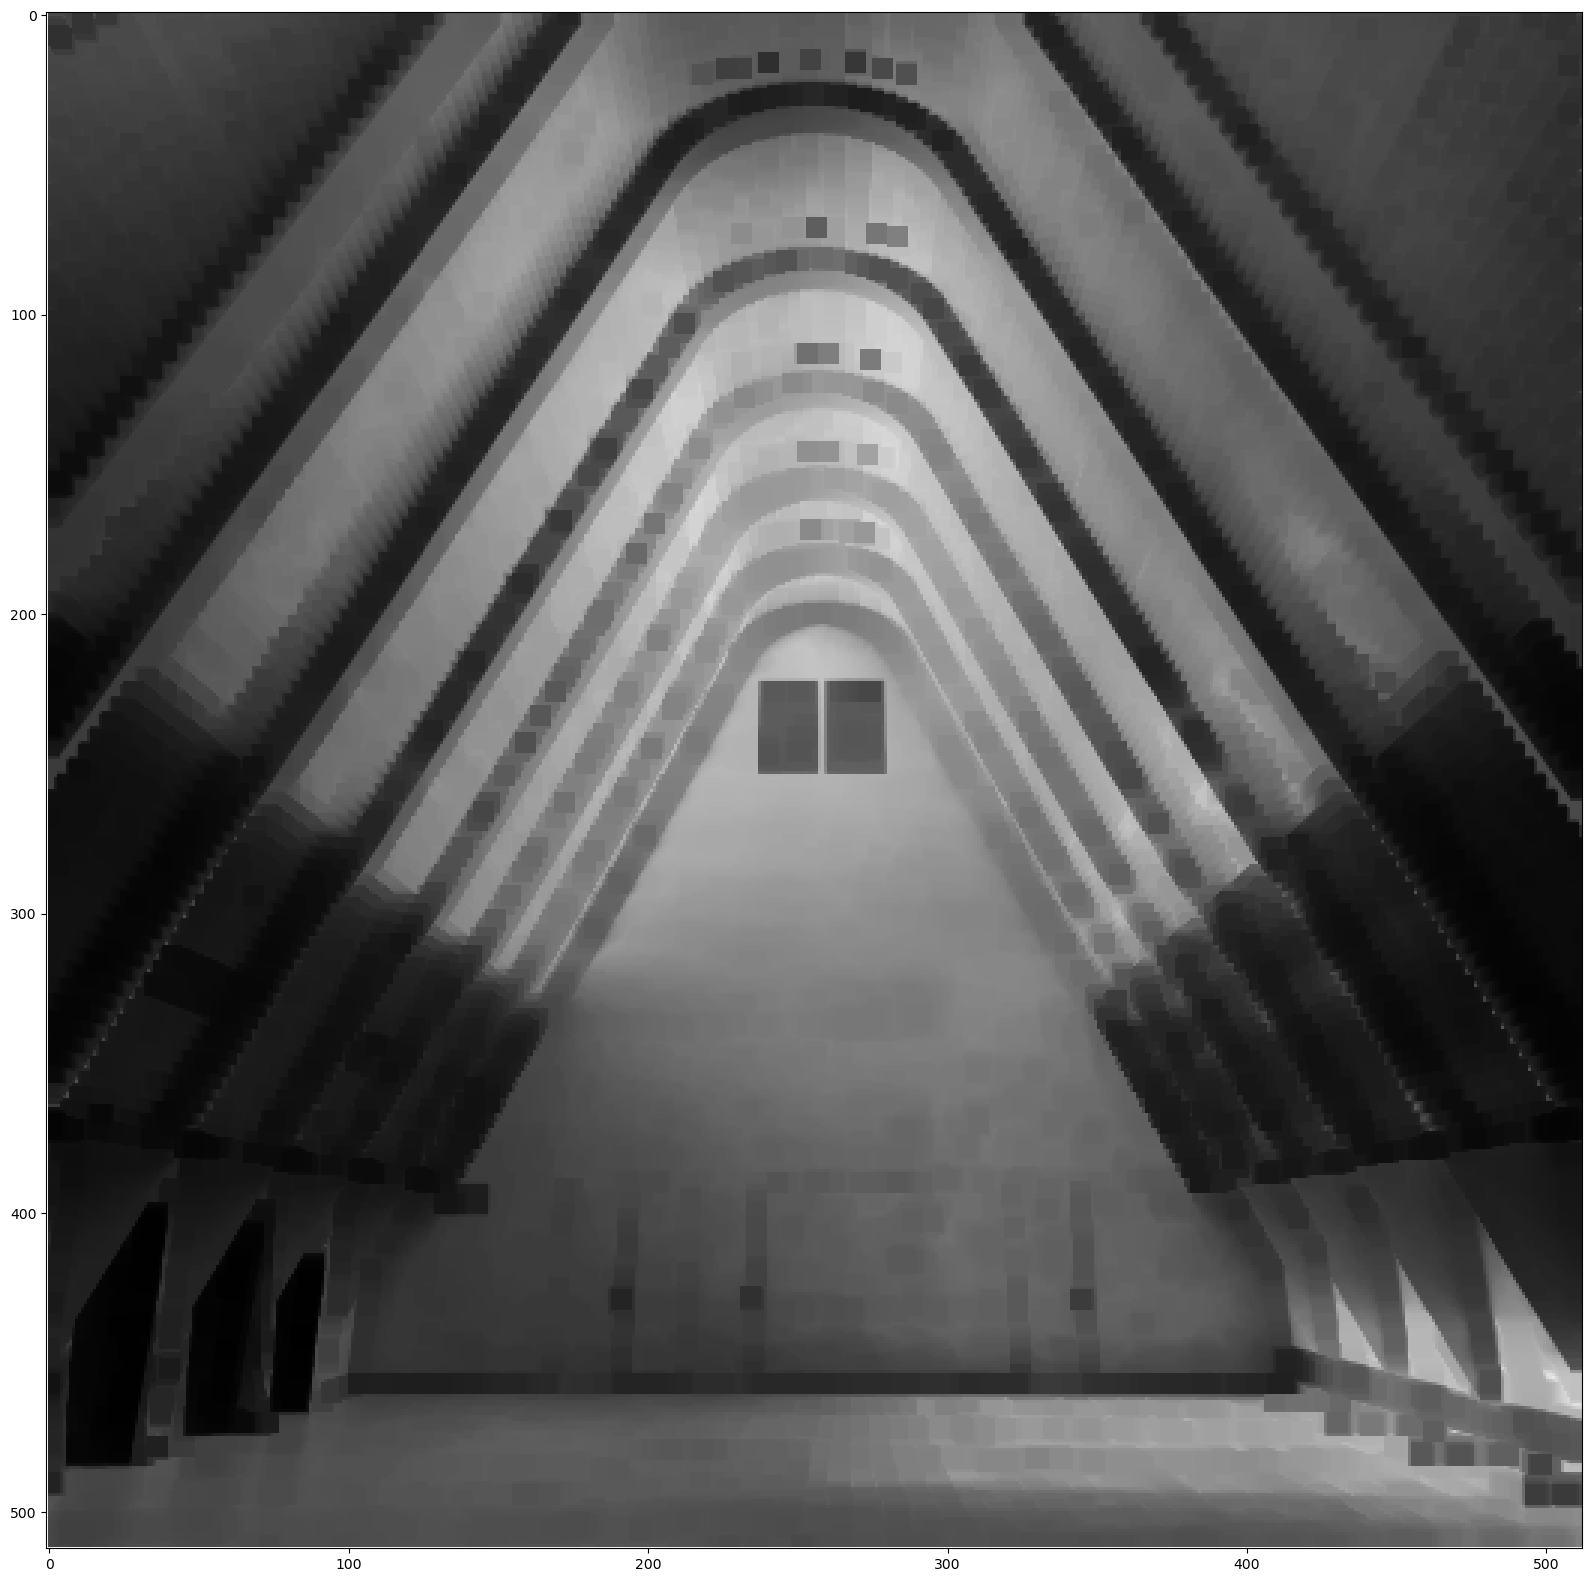

In [6]:
ima_dil1 = ndimage.grey_dilation(ima, footprint=se1, mode='constant', cval=minval)
ima_ero1 = ndimage.grey_erosion (ima, footprint=se1, mode='constant', cval=maxval)

display_image(ima_dil1,size=3)
display_image(ima_ero1,size=3)

<font color='purple'> Describe intuitively the processing results: </font>

 

**En la dilatació, podem apreciar com hi predominen tonalitats més clares ja que la dilatació s'encarrega d'agafar màxims. En aquest cas tenim un element estructurant quadrat de mida 7 x 7 amb la qual cosa, aquelles zones amb mínims propers a màxims han desaparegut i han esdevingut màxims. Un cas clar s'aprecia en la teulada, les parets o el sostre, fins i tot en els rectangles superiors que han disminuït la seva mida o en la llum d'emergència de la part de baix de l'esquerra, que ha esdevingut completament un màxim i els mínims han desaparegut. De fet en aquest últim hi podem veure l'element estructurant. Podem veure també com hi ha punts que tot i la dilatació, s'han mantingut de color negre, això es deu a que l'element estructurant no englobava màxims i per tant, els mínims s'han mantingut.
En canvi, en l'erosió, on ho agafem mínims, veiem com hi predominen tonalitats fosques. Aquells màxims amb mínims a una distància propera que pugui englobar l'element estructurant desapareixeran. Veiem com per exemple, la llum blanca del sostre s'ha convertit en els colors de les barres, o la llum del terra ja gairebé ha desaparegut. També veiem com la distància entre els dos rectangles s'ha fet més petita o que aquells punts on hi teníem gris i negre, ara hi tenim negre per complet (esquerra baix-centre). Veiem com la llum d'emergència ara és negra ja que ha eliminat el màxim per complet, de fet té la forma de l'element estructurant. Els contorns de les portes han pres més gruix a causa que els màxims propers s'han eliminat.**

Do the same experiment with se2

C:\Users\amola\AppData\Local\Temp\ipykernel_9468\2450367892.py:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


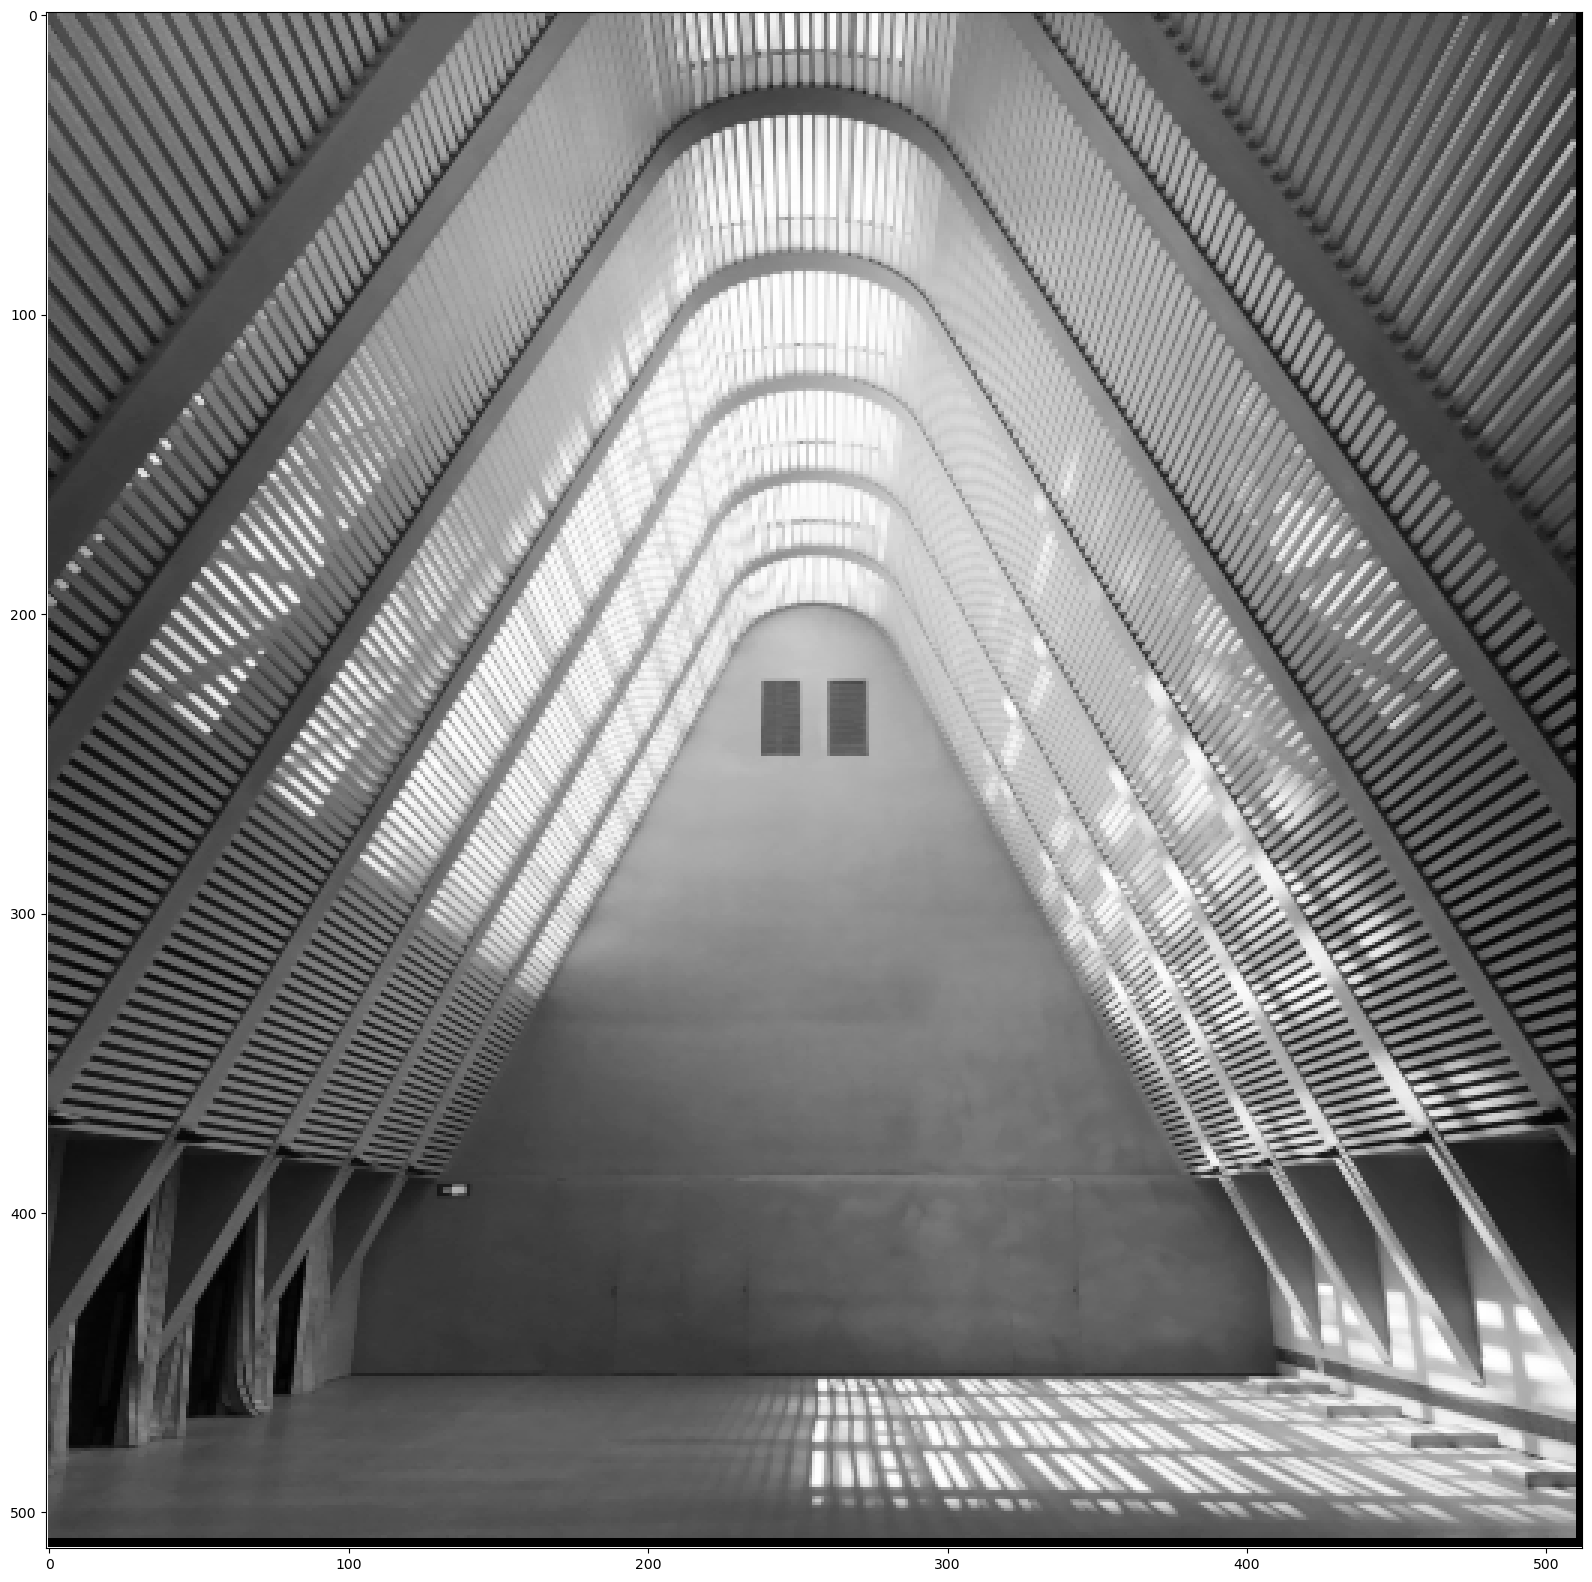

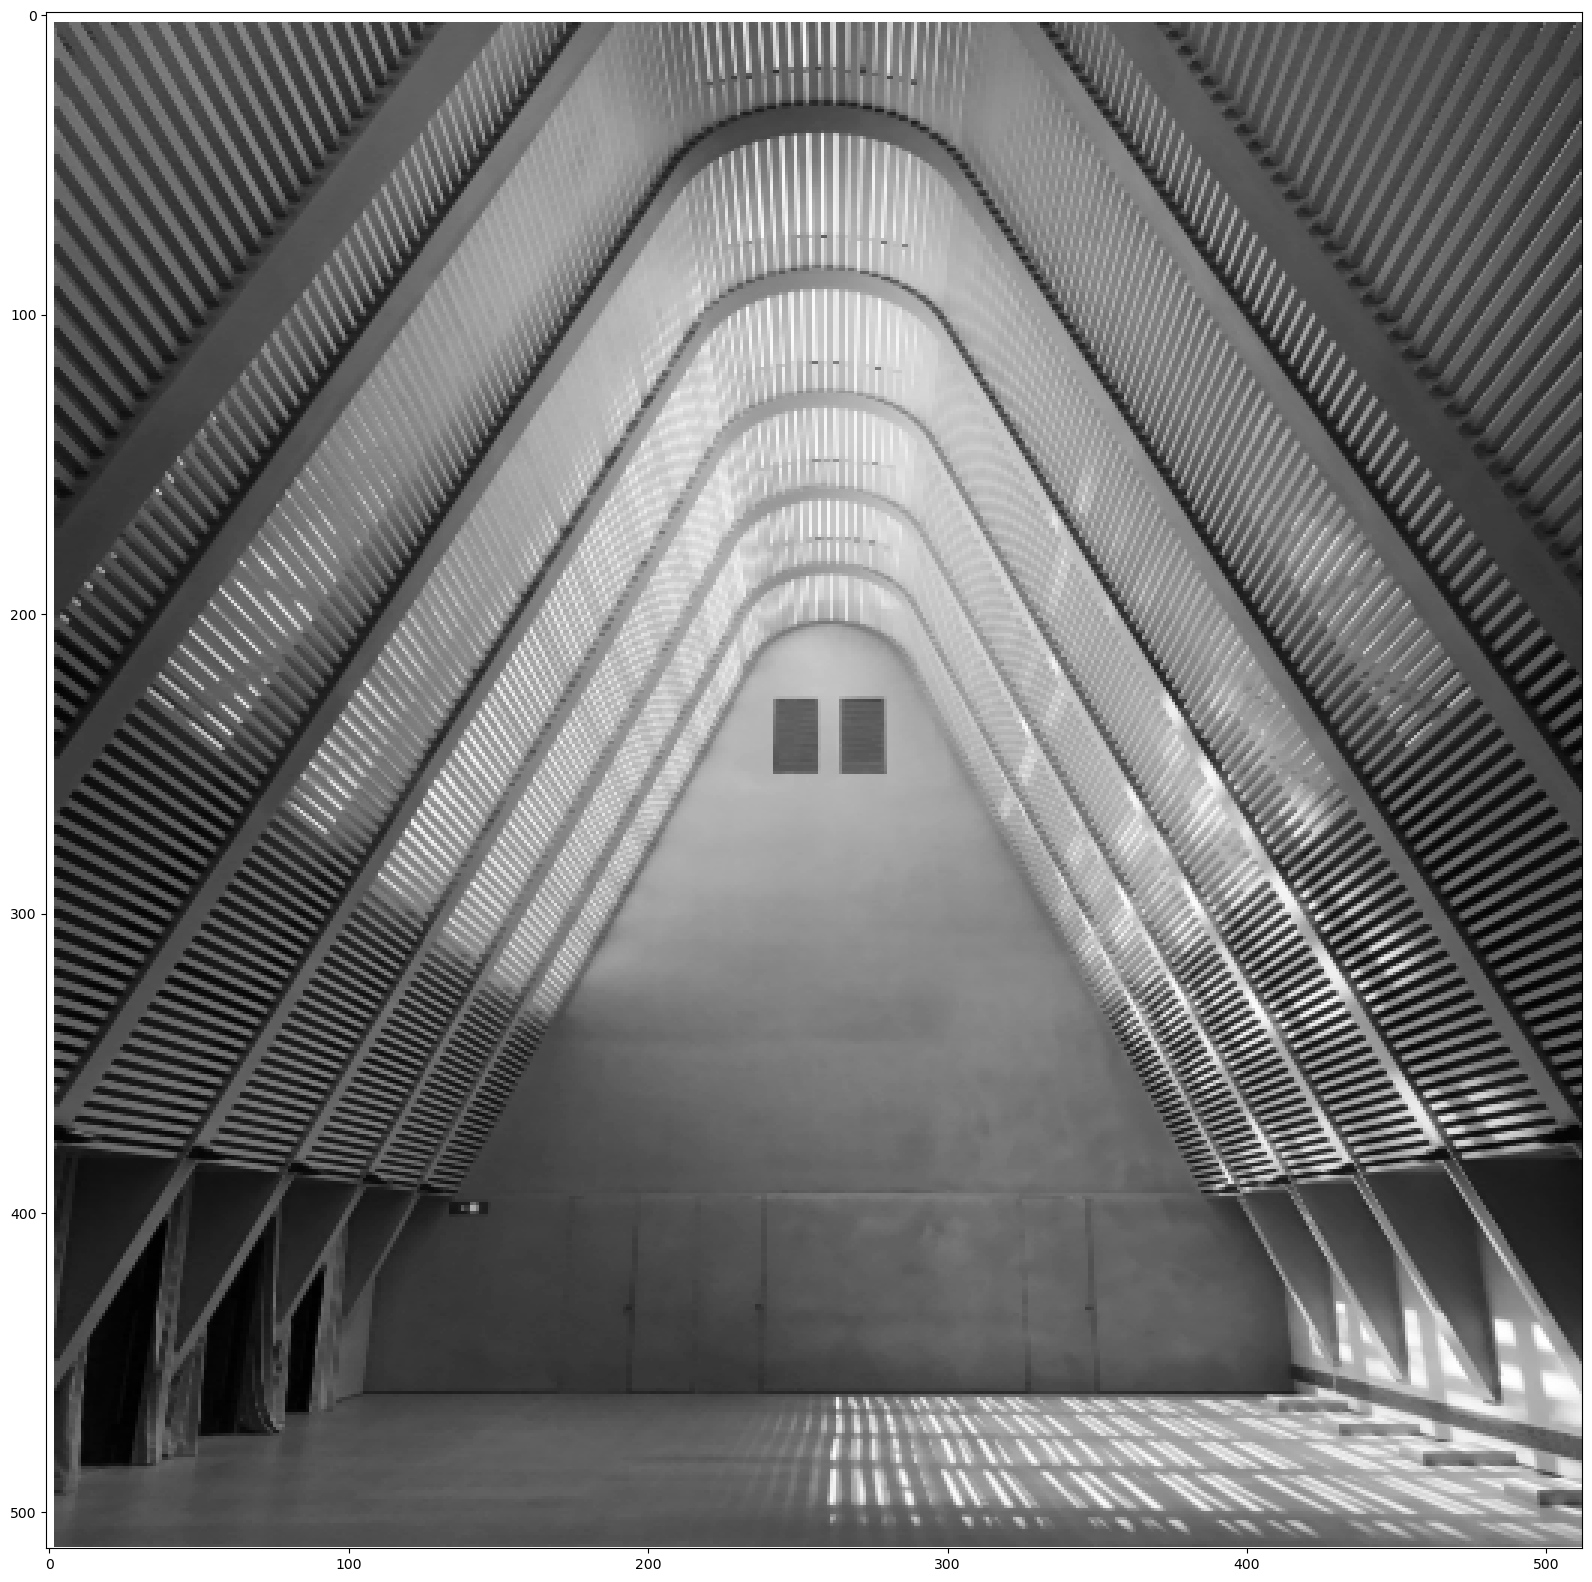

In [7]:
ima_dil2 = ndimage.grey_dilation(ima, footprint=se2, mode='constant', cval=minval)
ima_ero2 = ndimage.grey_erosion (ima, footprint=se2, mode='constant', cval=maxval)

display_image(ima_dil2,size=3)
display_image(ima_ero2,size=3)

<font color='purple'> Describe intuitively the processing results. Here in particular, we suggest to visualize the image after a strong zooming so that you can precisely observe what is going on. Look in particular at the four corners of the image.... some surprising gray level values are appearing in some of the image corners. Interpret why they are appearing and justify their number as well as gray level values.  : </font>

**Tal com hem definit l'element estructurant, aquest tractarà d'una manera especial les cantonades esquerres superiors. A simple vista podem veure com les imatges no han patit gairebé cap diferència. Però bé, si ampliem podem apreciar-ne petits detalls. En la dilatació, podem veure com els màxims han pres més presència, ho podem veure en la llum reflectida al terra, que té un gruix més gran, el mateix passa amb el sostre, que sembla que les barres de dalt que deixen passar la llum s'han fet més petites. Ara bé, una cosa que ens ha cridat l'atenció és el contorn negre que hi apareix a baix i a la dreta. Això es deu a que com ben bé sabem, quan apliquem un element estructurant, abans el girem, i per tant, com hi hem afegit un padding de valor el píxel més petit, l'element estructurant, per com està definit, sols agafa els valors que formen part del padding tant de baix com de la dreta ja que com hem dit, i per tant, per això veiem aquesta línia negra.
En l'erosió, passa gairebé igual, a simple vista costa diferenciar canvis, però si ens fixem en petits detalls, veiem com les barres de dalt que formen part del sostre i que tenen mínims, s'han fet més grans i per tant ara es deixa passar menys llum. Les línies de llum del terra s'han fet més petites i per exemple, veiem com els contorns de les portes s'han destacat. Podem veure com a la dreta i a dalt ha aparegut una línia blanca. Seguint la línia de l'explicació anterior, això es deu al padding fet amb valors màxims, per tant l'element estructurant hi haurà zones on només agafarà els màxims que corresponen al padding. Ara bé, veiem com passa al revés de la imatge de la dilatació, això es deu a que com hem dit, quan apliquem un element estructurant el girem, però si recordem de la teoria de classe, en l'erosió fem un gir extra, en la qual cosa té sentit que agafi els paddings de dalt i de l'esquerra.**

Do the same experiment with se3

C:\Users\amola\AppData\Local\Temp\ipykernel_9468\2450367892.py:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


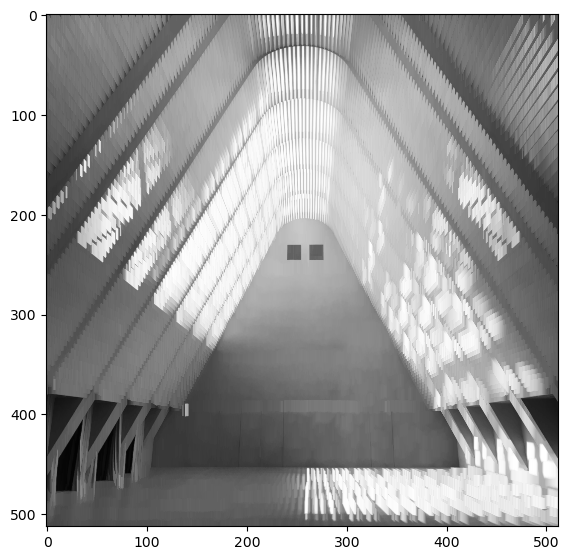

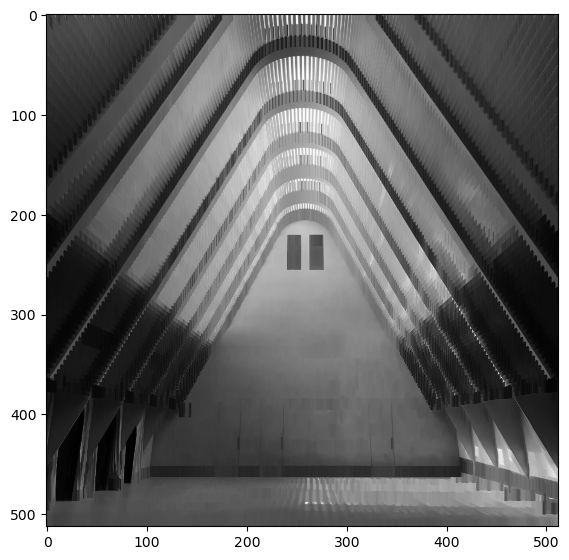

In [8]:
ima_dil3 = ndimage.grey_dilation(ima, footprint=se3, mode='constant', cval=minval)
ima_ero3 = ndimage.grey_erosion (ima, footprint=se3, mode='constant', cval=maxval)

display_image(ima_dil3,size=1)
display_image(ima_ero3,size=1)

<font color='purple'> Describe intuitively the processing results: </font>


**En aquest cas, per com està definit l'element estructurant, veiem que no ens passarà el que ens ha passat amb el segon element estructurant ja que aquest tercer sempre agafarà píxels de dins la imatge. Si ens fixem en la dilatació, podem veure com s'han ressaltat contorns verticals com la llum del sostre. Desapareixen els mínims de les parets laterals, però sembla com una mena d'escalat, a causas de la morfologia de l'element estructurant. Destacaríem també com ha actuat a les portes, que s'han tornat gariebé borroses o la llum reflectida del terra que ha pres més presència. Veiem com els dos rectangles de dalt s'han fet més petits ja que tenen valors més grans prop seu que ha fet que l'element estructurant quan ha entrat en contacte amb el seu voltant, agafi els píxels del voltant i per tant es facin més petits. En l'erosió en canvi, podem apreciar molts mínims com és evident, en aquest cas els rectangles s'han fet més grans ja que l'element estructurant quan passava per la paret, agafava el valor dels mínims dels rectangles i els ha fet més grans. Veiem com la llum reflectida ha desaparegut gairebé, les parets laterals han esdevingut en colors foscos i els contorns de les portes s'han remarcat, de fet, la seva forma en vertical és la de l'element estructurant. Els arcs també han pres més gruix.**

## 3	Study of the properties of the erosion and of the dilation

1)	The composition or erosions (or of dilations) is equivalent to an erosion (or dilation). 

<font color='purple'> Based on this property, compute the erosion and the dilation of ima with a rectangular structuring element of size 13x23 (13 in horizontal and 23 in vertical) combining "ndimage.grey_dilation( )" and "ndimage.grey_erosion( )"  with se1, se2 and/or se3 (you are not allowed to create a new structuring element, but only to concatenate operations). Use the cell below to write the necessary commands:  </font>

In [9]:
# Compute an erosion and a dilation combining elementary erosions and dilations 
# with se1, se2, and/or se3 
ima_dil4 = ndimage.grey_dilation(ima, footprint=se1, mode='constant', cval=minval)
ima_dil4 = ndimage.grey_dilation(ima_dil4, footprint=se1, mode='constant', cval=minval)
ima_dil4 = ndimage.grey_dilation(ima_dil4, footprint=se3, mode='constant', cval=minval)


ima_ero4 = ndimage.grey_erosion (ima, footprint=se1, mode='constant', cval=maxval)
ima_ero4 = ndimage.grey_erosion (ima_ero4, footprint=se1, mode='constant', cval=maxval)
ima_ero4 = ndimage.grey_erosion (ima_ero4, footprint=se3, mode='constant', cval=maxval)


<font color='purple'> Describe and justify the strategy you have been using:  </font>
  
  
**L'aplicació de dos filtres 7x7 de manera consecutiva és equivalent a usar un filtre 13x13 (7+7-1). Si després apliquem se3, que per molt i tenir mida 11x11 només té influència sobre píxels de la regió 1x11, aconseguim un filtre 13x23.**

2)	The dilation is extensive if and only if the space origin belongs to the structuring element. 

<font color='purple'> To verify this property, compute the difference between the input ant the output of a dilation and study the dynamical range of this difference. Analyze the cases of se2 and se3:  </font>


In [10]:
difference_se2 = ima_dil2 - ima;
print("Difference: max", np.amax(difference_se2), ", min", np.amin(difference_se2))

difference_se3 = ima_dil3 - ima;
print("Difference: max", np.amax(difference_se3), ", min", np.amin(difference_se3))

Difference: max 0.8244721896752796 , min -0.9395544364186761
Difference: max 0.8496315705644597 , min 0.0


<font color='purple'> What conclusions can be drawn from the figures obtained in the cell above?  </font>


**Que una dilatació sigui extensiva implica que el valor d'un píxel x de la imatge original és sempre menor o igual que el valor del mateix píxel de la imatge dilatada. Això s'hauria de complir per qualsevol píxel per que tingués lloc una dilatació extensiva. Per tant, fer la resta "imatge dilatada - imatge original" hauria de resultar sempre en valors majors o iguals a zero.**

**Pels resultats obtingut podem veure que això es compleix quan s'usa l'element estructurant se3, que té valor de píxel 1 en l'origen, és a dir, el conté. En canvi, observem que per l'element estructurant se2 això no es compleix, donat que la resta entre imatges genera valors negatius, el que indica no extensivitat. Si ens fixem en la seva estructura veiem que és compleix la proposició de l'enunciat, donat que en aquest cas el píxel d'origen no pertany a l'element estructurant (té valor 0).**

**Si ho pensem lògicament, no incloure el píxel de l'origen a l'hora de calcular la dilatació implica no tenir en compte el píxel de la imatge original per calcular la imatge dilatada. Així doncs s'obra la porta a la possibilat de que el píxel central fós el màxim absolut del seu neighborhood, donant lloc a una situació en que el píxel tidria un valor major en la imatge original que en la dilatada. Així doncs, incompliríem la propietat d'extensivitat.**

## 4 Opening and closing
The morphological opening and the morphological closing are created from the composition of erosion and dilation.

<font color="purple">Compute an opening and a closing on ima with se1. Create the opening and the closing from "ndimage.grey_dilation( )" and "ndimage.grey_erosion( )". Display them. Use the cell below to write the necessary commands. </font>


C:\Users\amola\AppData\Local\Temp\ipykernel_9468\2450367892.py:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


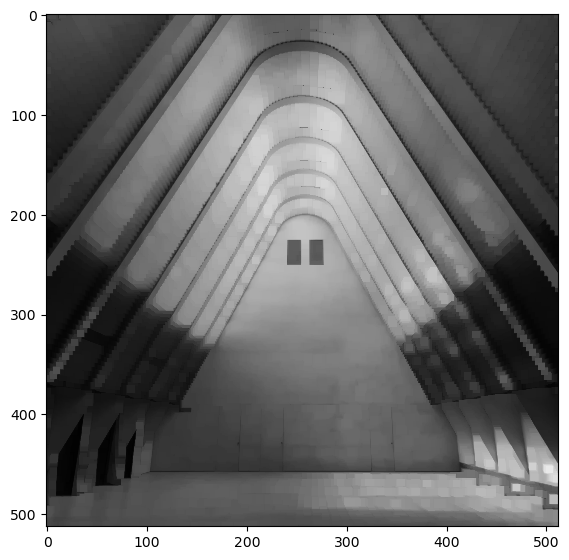

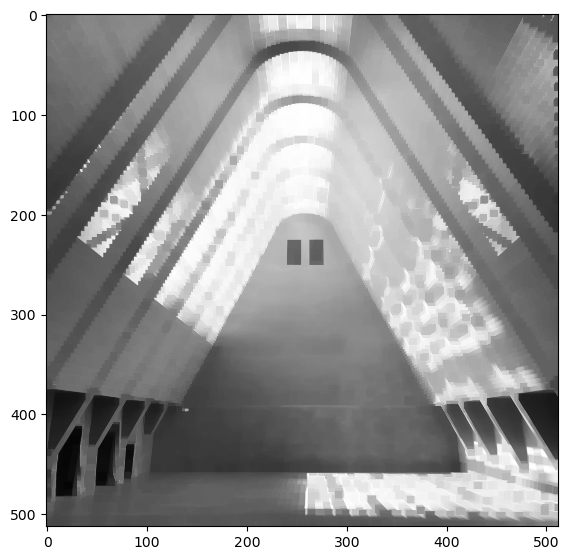

In [11]:
# Compute an opening and a closing by combining elementary erosion and dilation

#OPENING
ima_opening_eros = ndimage.grey_erosion(ima, footprint=se1, mode='constant', cval=maxval)
ima_opening_dil = ndimage.grey_dilation(ima_opening_eros, footprint=se1, mode='constant', cval=minval)

display_image(ima_opening_dil,size=1)

#CLOSING
ima_closing_dil = ndimage.grey_dilation(ima, footprint=se1, mode='constant', cval=minval)
ima_closing_eros = ndimage.grey_erosion(ima_closing_dil, footprint=se1, mode='constant', cval=maxval)

display_image(ima_closing_eros,size=1)

<font color='purple'> Describe intuitively the processing effect:  </font>

**En la primera fotografia, estem fent un opening. Si mirem de manera detallada què ha fet la transformació a la imatge, ens podem fixar com tots aquells elements de color blanc amb una mida més petita que l'element estructurant de mida 7 x 7 han perdut qualitat o fins i tot han desaparegut. Fixem-nos per exemple en la part del sostre, on la llum incident ha desaparegut o en el terra, com la llum que hi entrava ha desaparegut. Per contra, aquells punts on hi trobàvem molts mínims, aquests s'han propagat més pel seu voltant.**

**En canvi, en la segona foto hi hem fet un closing. En aquest cas, podem veure com la fotografia transformada té molts més màxims que la fotografia original. Això es deu a que el closing s'encarrega d'eliminar els objectes de color negre de mida més petita que l'element estructurant. Per tant, veiem com aquells punts on hi teníem negre (mínim) ara hi tenim màxims. Fixem-nos en com el sostre sembla que sigui transaprent o com les parets laterals han perdut el color negre i ara són gairebé grises. S'han mantingut els mínims en zones poc influenciades per màxims (part esquerra del terra) o els dos rectangles superiors. Veiem com les portes de la paret frontal han desaparegut i ja no hi podem veure els seus contorns.**

## 5	Study of the properties of the opening and of the closing:
From now on we are going to use the skimage [skimage](http://scikit-image.org/docs/stable/api/api.html) package which also includes morphological operations. The opening (closing) can be directly computed with morphology.opening (morphology.closing). 



C:\Users\amola\AppData\Local\Temp\ipykernel_9468\2450367892.py:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


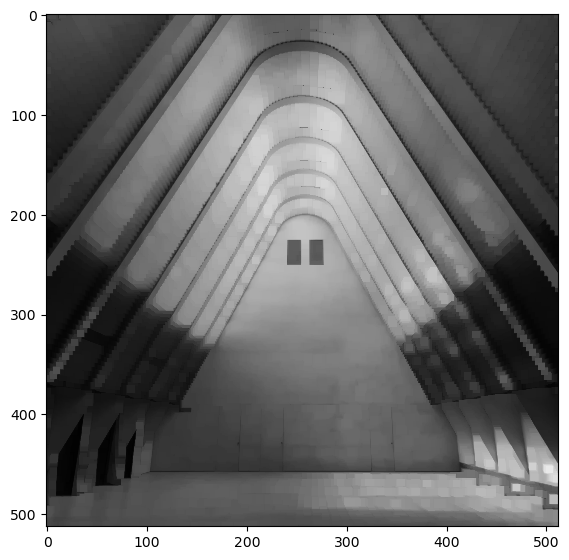

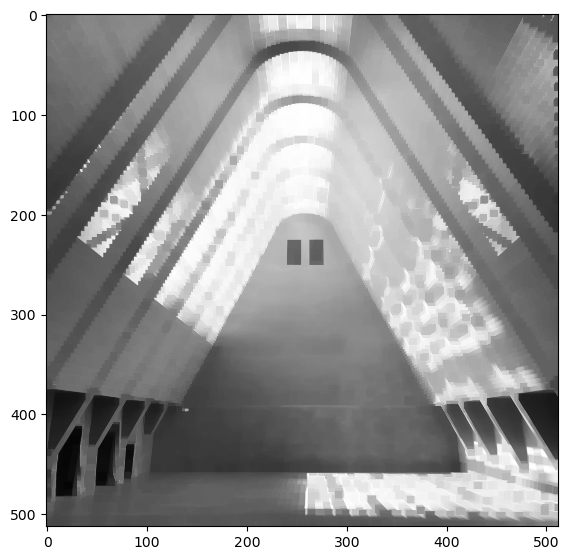

In [12]:
from skimage import morphology

#Example of opening and closing with skimage
ima_ope  = morphology.opening(ima,se1)
ima_clo  = morphology.closing(ima,se1)

display_image(ima_ope,size=1)
display_image(ima_clo,size=1)

The opening is anti-extensive, increasing and idempotent, whereas the closing is extensive, increasing and idempotent. 

<font color="purple"> Using the structuring elements se1 and the commands np.amax() and np.amin(), define two experiments to verify the properties of idempotence and anti-extensivity of the opening. Write the  code below. </font>



In [13]:
# Write the code to verify that an opening is idempotent

ima_ope  = morphology.opening(ima,se1)
ima_ope1  = morphology.opening(ima_ope,se1)

diff = ima_ope1 - ima_ope
idemp = True
for i in range(len(diff)):
    for j in range(len(diff[0])):
        if diff[i][j] != 0:
            idemp = False
            print("Opening is not idempotent!")
            break
if idemp:
    print("Opening is idempotent!")

# Write the code to verify that an opening is antiextensive
dif_opening = ima - ima_ope
print("Difference: max", np.amax(dif_opening), ", min", np.amin(dif_opening))
if np.amax(dif_opening) >= 0 and np.amin(dif_opening) >= 0:
      print("Opening is anti-extensive!")
else:
    print("Opening is not anti-extensive!")

Opening is idempotent!
Difference: max 0.8288348513487418 , min 0.0
Opening is anti-extensive!


<font color='purple'> Describe your experiments and their outcome:  </font>


*Idempotence*
**Per tal que una transformació sigui idempotent, la composició de transformacions ha de deixar igual la imatge. En el cas de l'opening, hem tornat a aplicar un opening a l'output últim. Aquestes dues imatges, haurien de ser iguals, per tant, fem la diferència entre totes dues i el resultat ha de donar una matriu amb un zero en totes les seves posicions. És el que hem fet i així ha donat, per tant, hem demostrat que l'opening és idempotent.**


*Anti-extensivity*:
**Per tal que una transformació sigui anti-extensiva, s'ha de complir:**
$\gamma_b(x) \leq x$. **Per tal de provar això, com hem fet abans, basta en veure que la diferència entre la imatge original i la transformada té un rang dinàmic positiu o igual a zero, és a dir, que no hi ha cap píxel de la imatge transformada que sigui més gran que cap píxel de la imatge original. Hem fet aquesta comprovació i hem pogut veure com el rang dinàmic va de 0.0 fins a 0.828 en la qual cosa podem afirmar que l'opening és anti-extensiu.**



## 6	Filters by reconstruction
Filters by reconstruction use a "marker" image to define the simplification effect. The marker is progressively dilated conditionally to the original image in order to reconstruct the contours of the components that have not been completely removed. In the sequel, we analyse the simplification effect as a function of the strategy to create the "marker" image. 

**Binary image:**
Select the reference image "Tools.bmp" and the marker image "Mark.bmp" and compute the reconstruction. Note that the marker image has to be lower or equal to the reference image (this is enforced by the np.minimum)



C:\Users\amola\AppData\Local\Temp\ipykernel_9468\2450367892.py:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


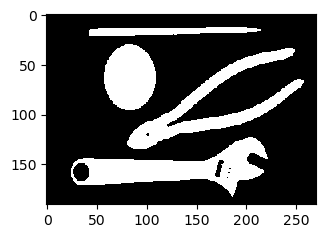

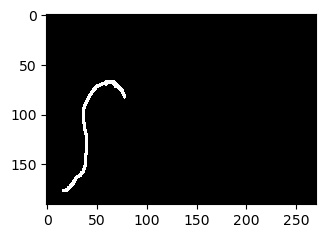

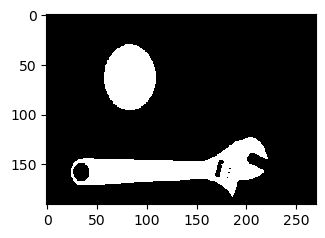

In [14]:
ref = io.imread('Tools.bmp',as_gray=True)
mar = io.imread('Mark.bmp', as_gray=True)
display_image(ref,size=1)
display_image(mar,size=1)

mar1 = np.minimum(mar,ref)
rec = morphology.reconstruction(mar1, ref, method='dilation')
display_image(rec,size=1)

<font color='purple'> Comment and justify the result:  </font>


**La imatge resultant de la reconstrucció preserva la clau anglesa i el cercle de manera gairebé perfecta (visualment no apreciem diferències) mentre que elimina per complet els altres dos elements de color blanc. El marcador, si el sobreposéssim a la imatge de referència, observaríem que entra en contacte amb els dos objectes que s'han preservat. Quan fem el mínim de les dues imatges, els únics píxels que tindran valor diferents de negre són aquells on existeix sobreposició de píxels blancs, que es troben a les regions ocupades per els dos objectes que s'han preservat.**

**Quan després apliquem reconstrucció per dilatació augmentem la mida de les regios blanques, tenint com a referència la imatge original que ens ajuda a delimitar les components connexes. Així doncs, la dilatació expandirà els píxels bancs fins a les regions delimitades per la imatge de referència, donant lloc a una reconstrucció perfecta de la clau anglesa i el cercle. Quan després superposem aquesta imatge marcador dilatada a la original, la clau anglesa i el cercle són iguals a ambos llocs i fer el mínim ens dona com a resultat la imatge marcador.**

Let us now compute the dual reconstruction. 

C:\Users\amola\AppData\Local\Temp\ipykernel_9468\2450367892.py:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


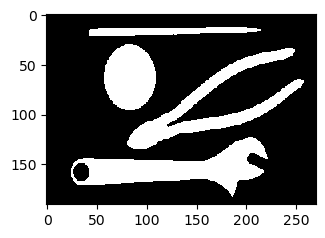

In [15]:
mar2 = np.maximum(255-mar,ref)
rec = morphology.reconstruction(mar2, ref, method='erosion')
display_image(rec,size=1)

<font color='purple'> Why did we define mar2 as a function of 255-mar? Comment and justify the dual reconstruction result:  </font>


**Aplicant 255-mar aconseguim invertir el marcador, és a dir, que les regions blanques passin a ser negres i viceversa. Quan després calculem el màxim entre referència i marcador, donat que gairebé tota la imatge marcador és blanca, i que per tant entra en contacte amb tots els objectes diferents (components connexes), en fer el màxim de dos píxels blancs obtindrem també píxels blancs. Així doncs tots els objectes quedaran marcats i la majoria de la imatge quedarà blanca.**

**Quan apliquem erosió, la única regió negra que ens queda és la part del nou marcador que no se superposava amb cap component connexa de color blanc de la imatge original. Així doncs, guiats per la imatge de referència que delimita els límits fins on podem erosionar, comencem a ampliar les zones negres. Com observem, el resultat acaba sent l'ennegriment dels píxels que formen el fons i els del forat de la clau anglesa. Es pot observar però que els detalls de la part davantera de la clau anglesa s'han perdut donat que el marcador no entrava en contacte amb ells i per tant, alhora d'aplicar el màxim s'han perdut. Al final superposem el marcador erosionat amb la imatge de refèrencia i ens quedem amb el màxim de les dues, el que resulta en la imatge marcador erosionada.**

Let us now use as marker, an image that has been derived from the reference image itself. As an example, let us use the abolute maximum (or maxima) of the gray level image "ima". 

C:\Users\amola\AppData\Local\Temp\ipykernel_9468\2450367892.py:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


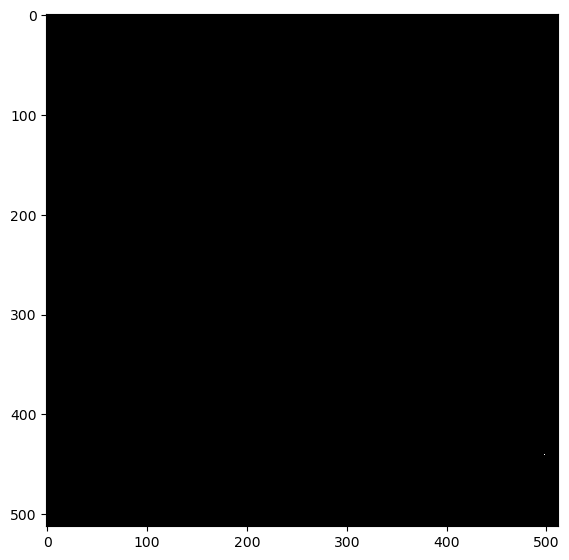

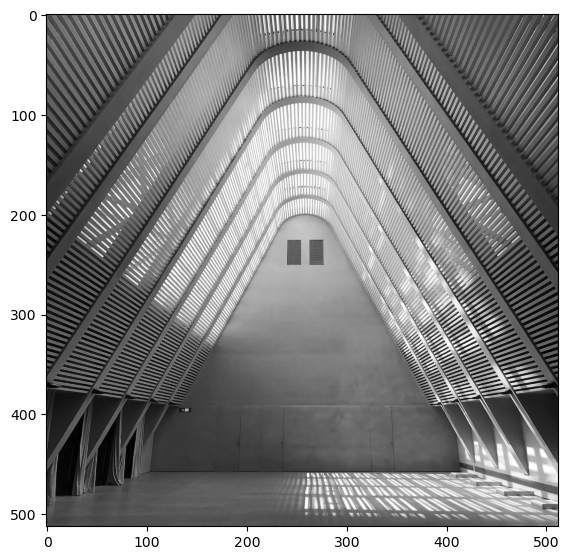

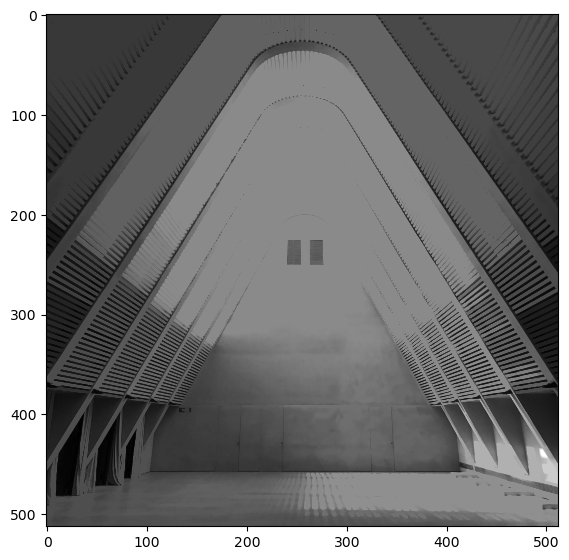

In [16]:
# Define a marker image involving only the pixels corresponding to the absolute maxima of the image
mar3 = np.copy(ima)
mar3[mar3<maxval] = 0
display_image(mar3,size=1)

# Compute the reconstruction
rec = morphology.reconstruction(mar3, ima, method='dilation')
display_image(ima,size=1)
display_image(rec,size=1)

<font color='purple'> Comment and justify the result:  </font>

**La imatge marcador consta d'un únic píxel (maxval) de color blanc sobre un fons de píxels negres. Quan dilatem la imatge marcador guiada per la imatge referència, extenem les regions de color blanc per les zones connexes. Quan superposem aquesta imatge marcador dilatada amb la imatge referència i agafem els mínims de les dues obtenim la imatge anterior. Aquesta tècnica serveix per suavitzar la imatge, reduint la intensitat dels píxels, eliminant així els blancs purs i perden els detalls on teníem píxels de valors alts, com era el cas del sostre.**

During the lecture, we have seen that a classical way to construct the marker image is to use an erosion on the original image. This leads to the so-called "opening by reconstruction of erosion". The following cells implement this function assuming the erosion is computed with the a new struturing element se4. 

C:\Users\amola\AppData\Local\Temp\ipykernel_9468\2450367892.py:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


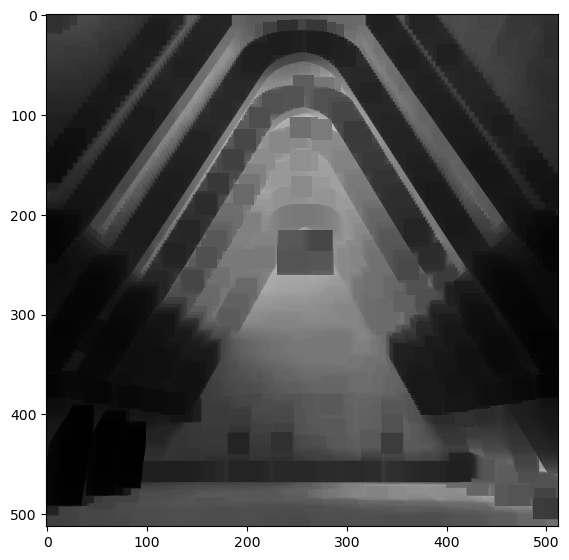

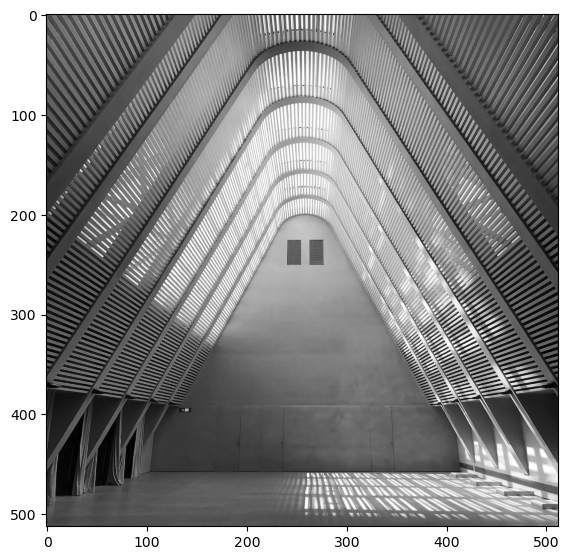

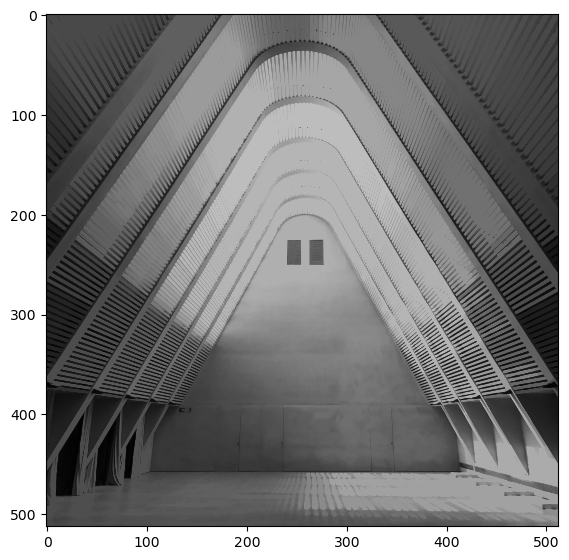

In [17]:
# Define the marker as the erosion of ima with se1
se4 = np.ones((21,21))
mar4 = morphology.erosion(ima,se4)
display_image(mar4,size=1)

# Compute the reconstruction
rec = morphology.reconstruction(mar4, ima, method='dilation')
display_image(ima,size=1)
display_image(rec,size=1)

<font color='purple'> Comment and justify the result:  </font>


**Ara observem que el resultat s'assembla més a la imatge original que el de l'anterior apartat. Trobem molts més detalls recuperats, sobretot al sostre, i la intensitat dels píxels és major. Obtenim aquests resultats degut a que la imatge marcador conté més informació sobre la imatge original i permet que la dilatació no tingui només un punt d'expansió (com en el cas de tenir com a marcador el màxim), sinó que ara tenim diverses components connexes. Així doncs, es poden recuperar millor els detalls de les zones de ràpida intercalació blanc-negre, com el cas del sostre. 
Tot i això, observem que la reconstrucció no ha estat perfecte perquè veiem el sostre borrós. Això és degut a que aquesta tècnica sol eliminar els detalls fins com aquests.**

Implement now the dual operator, that is the closing by reconstruction of dilation (with se4)

C:\Users\amola\AppData\Local\Temp\ipykernel_9468\2450367892.py:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


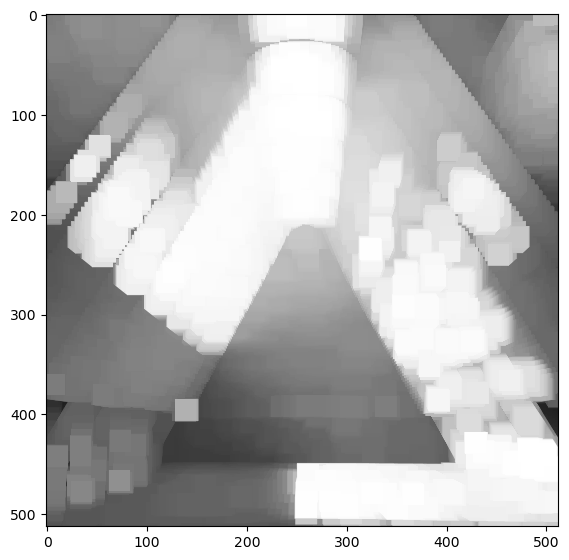

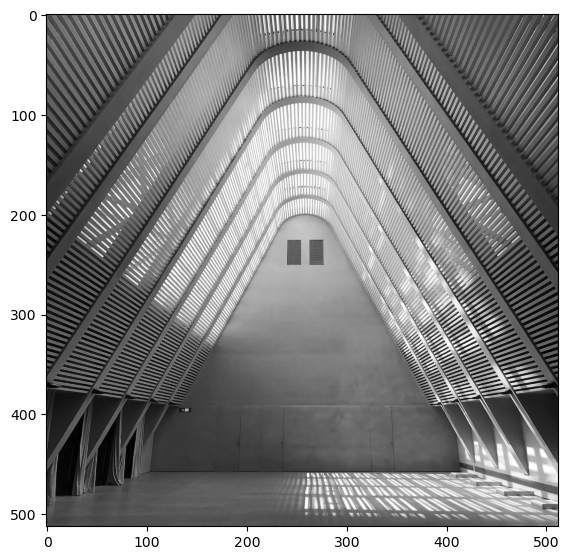

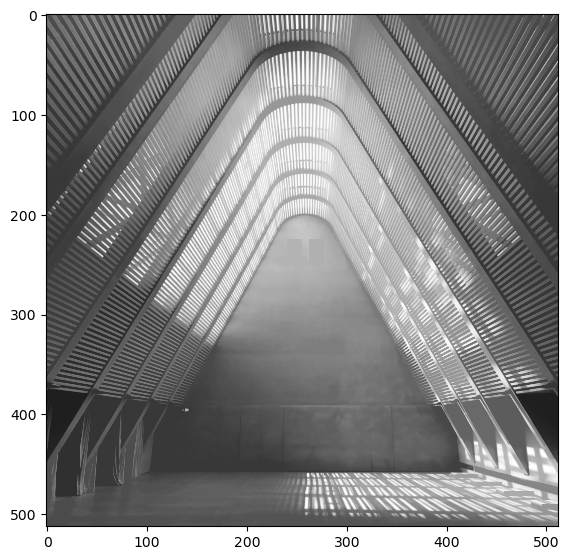

In [18]:
# Implement a closing by reconstruction of dilation

# Define the marker as the dilation of ima with se1
mar5 = morphology.dilation(ima,se4)
display_image(mar5,size=1)

# Compute the reconstruction
rec = morphology.reconstruction(mar5, ima, method='erosion')
display_image(ima,size=1)
display_image(rec,size=1)

<font color='purple'> Comment and justify the result:  </font>


**Amb el closing by reconstruction of dilation aconseguim recuperar a la perfecció els detalls dels sostre. Tot i això, observem que alguns elements com les finestres o el negre de la part baixa de les parets han desaparegut o s'han difuminat moltíssim. 
Això és degut a que aquesta tècnica omple gradualment els forats de la imatge i intenta unir components connexes diferents, reduint així la presència de negre a la imatge.**

## Granulometry

In this last section, we analyze the notion of granulometrry and its potential use as texture descriptor. To this end, we will use a small texture dataset made of woven fabric images. 


Select one of the image (modify the first line of the following cell) and compute its granulormetic curve. 

C:\Users\amola\AppData\Local\Temp\ipykernel_9468\2450367892.py:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


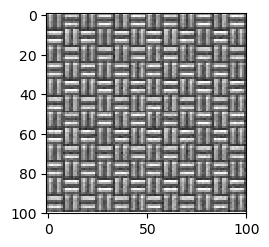

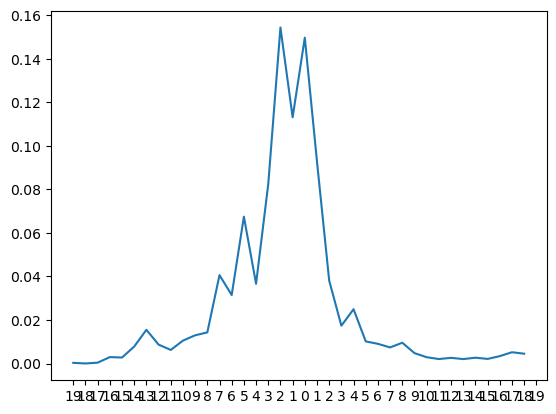

In [19]:
# Choose the image to be analysed
Texture = io.imread("Woven/woven_0001.jpg",as_gray=True)/256

# Compute the pattern sepctrum with a serie of opening and closing with a circular 
# structuring element
n=20
sizes   = np.arange(1,n,1)
val_ori   = Texture.sum()
val_open  = [morphology.opening(Texture, morphology.disk(n)).sum() for n in sizes]
val_close = [morphology.closing(Texture, morphology.disk(n)).sum() for n in sizes]
Granulometry     = np.concatenate((np.flip(val_close),[val_ori],val_open))
Pattern_Spectrum = -np.diff(Granulometry)
Pattern_Spectrum_Query = Pattern_Spectrum/Pattern_Spectrum.sum()

# Display the image and the Pattern spectrum
display_image(Texture,size=2)
Axes_val = np.concatenate((np.flip(sizes),[0],sizes))
plt.xticks(np.arange(0,np.size(sizes)*2+1,1),Axes_val)
plt.plot(Pattern_Spectrum_Query)


<font color='purple'> Comment the curve and relate its shape with the image content:  </font>

**En aquesta corba hi tenim a la part de l'esquerra la detecció d'objectes negres mentre que a la dreta la detecció d'objectes blancs. Cada valor representa la diferència entre una transformació de mida anterior, de tal manera que si el valor en aquell punt és alt, voldrà dir que tindrem molts elements d'aquella mida ja que l'element estructurant d'aquella mida els haurà eliminat i la diferència ens els haurà mostrat. En el nostre cas (la imatge 0001), podem veure com tenim molts elements de mida 1 i 2, que suposem que vindrian a ser els diferents rectangles que conformen la imatge.**

As can be seen, the granulometry can be interpreted as a texture signature of the image. It can be used in a **Query by Example** context. 

In a Query by Example appication, the user wants to retrieve images that are similar to a query image and the only interaction consists of showing the example image to the query system. The user does not precisely describe what is meant by *retrieving similar images*. It is up to the system to define what is considered as being similar to the example provided by the user. Here we will assume that the notion of similarity is related to the size distribution and therefore to the pattern spectrum. 

Assuming that the image  you have just analyzed is the query image, the following cell computes the pattern spectrum of all images in the dataset and compute the euclidean distance between their pattern spectrum and that of the query image.


In [20]:
from scipy.spatial import distance
import glob

# List of image to be analyzed
list_of_images = sorted(glob.glob('Woven/woven*.jpg'))
dst = np.zeros(len(list_of_images))

# Compute the granulomtry
n=20
sizes = np.arange(1,n,1)
i=0
for filename in list_of_images:
  Texture = io.imread(filename,as_gray=True)/256
  val_ori   = Texture.sum()
  val_open  = [morphology.opening(Texture, morphology.disk(n)).sum() for n in sizes]
  val_close = [morphology.closing(Texture, morphology.disk(n)).sum() for n in sizes]
  Granulometry     = np.concatenate((np.flip(val_close),[val_ori],val_open))
  Pattern_Spectrum = -np.diff(Granulometry)
  Pattern_Spectrum = Pattern_Spectrum/Pattern_Spectrum.sum()
  # Compute the euclidean distante between the pattern spectra
  dst[i] = distance.euclidean(Pattern_Spectrum, Pattern_Spectrum_Query)
  print("Image: ", filename, ",   Distance: ", dst[i])
  i=i+1

Image:  Woven\woven_0001.jpg ,   Distance:  0.0
Image:  Woven\woven_0002.jpg ,   Distance:  0.19442383555653217
Image:  Woven\woven_0003.jpg ,   Distance:  0.1743364048260677
Image:  Woven\woven_0004.jpg ,   Distance:  0.12049736204316115
Image:  Woven\woven_0005.jpg ,   Distance:  0.08440906860506261
Image:  Woven\woven_0007.jpg ,   Distance:  0.24956279424161287
Image:  Woven\woven_0010.jpg ,   Distance:  0.11730372182297548
Image:  Woven\woven_0011.jpg ,   Distance:  0.11405577892682077
Image:  Woven\woven_0012.jpg ,   Distance:  0.10967430811161438
Image:  Woven\woven_0013.jpg ,   Distance:  0.1104200435792382
Image:  Woven\woven_0014.jpg ,   Distance:  0.10511621120712294
Image:  Woven\woven_0015.jpg ,   Distance:  0.09993957655920757
Image:  Woven\woven_0016.jpg ,   Distance:  0.1512081907012611
Image:  Woven\woven_0017.jpg ,   Distance:  0.21679239788744886
Image:  Woven\woven_0018.jpg ,   Distance:  0.21031560857333317
Image:  Woven\woven_0019.jpg ,   Distance:  0.0877371187876

Finally, the three best matches (omiting the query image) are reported. The corresponding distances are provided (note that if these distances are rather high, the system has not really been able to identify similar images). Finally the query and the thee retrieved images are displayed.

The best marches are Woven\woven_0111.jpg Woven\woven_0039.jpg Woven\woven_0130.jpg
with distance values: 0.05577103328037197 0.05810324414928484 0.07220600035651895


C:\Users\amola\AppData\Local\Temp\ipykernel_9468\2450367892.py:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


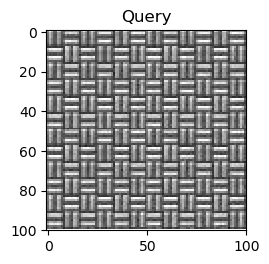

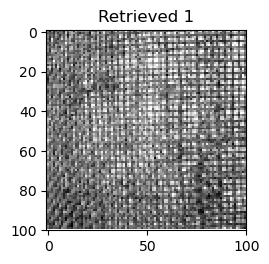

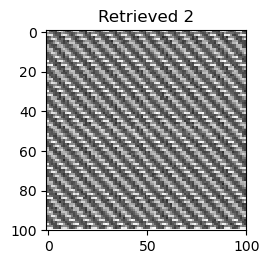

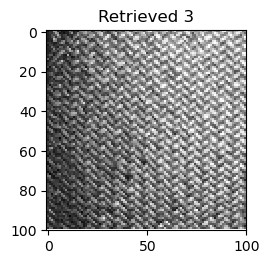

In [21]:
sort_index = np.argsort(dst)
print("The best marches are", list_of_images[sort_index[1]], 
      list_of_images[sort_index[2]],
      list_of_images[sort_index[3]])
print("with distance values:", dst[sort_index[1]], dst[sort_index[2]], dst[sort_index[3]])
display_image(io.imread(list_of_images[sort_index[0]])/256,title='Query',size=2)
display_image(io.imread(list_of_images[sort_index[1]])/256,title='Retrieved 1',size=2)
display_image(io.imread(list_of_images[sort_index[2]])/256,title='Retrieved 2',size=2)
display_image(io.imread(list_of_images[sort_index[3]])/256,title='Retrieved 3',size=2)

<font color='purple'> Make a few experiments with several query images. Analyse the outcome and comments the results of these experiments:  </font>


**Després d'haver mirat diverses imatges, hem pogut apreciar com és un bon mètode per detectar imatges similars tenint en compte la distribució de les mides dels elements que conformen les imatges. Ara bé, hem de tenir en compte que algunes vegades, la mida dels objectes que conformen una imatge no és la característica més important per distingir imatges. O bé, si tenim imatges amb formes irregulars o complexes també pot ser complicat, però tenint en compte les imatges que tenim a la pràctica, estan pensades per tal de buscar similarituds entre elles amb la granulometria. Les imatges trobades solen ser similars i tenir les tonalitats de color a la mateixa posició.**

**Hem anat fent proves agafant imatges aleatòries de la carpeta, i per exemple hem vist com la 0001 funciona de manera correcta. La 0118 hem pogut veure com per a l'ull humà sembla més similar la tercera que no les dues primeres, tot i que l'algoritme la posa tercera. La 0041 considerem que la segona i la tercera no són tan similars o la 0102 on hi trobem una línia ben remarcada i diferenciada i en les imatges similars, no hi trobem res similar.**

---
Congratulations! You have finished this laboratory! Save the notebook and upload it in Atenea.